In [374]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math

# Distribuciones de Probabilidad

## Poisson

$P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!} \\ k \in \{0, 1, 2, \dots \}$

Se interpreta como la probabilidad de ocurrencias de $k$ eventos en  un intervalo de tiempo, el cual pasa en promedio $\lambda$ veces en este mismo intervalo

In [375]:
def poisson(k, lam):
    return (lam**k * math.e**(-lam)) / (math.factorial(k))

Ejemplo: Se sabe que en cierto canal hay 2 transacciones fraudulentas por dia, por lo que se hará un operativo de monitoreo a todas las transacciones durante un dia, pero primero se quiere saber cual es la probabilidad de que haya almenos una transaccion fraudulenta.

Respuesta: La probabilidad es de 86.4%

In [376]:
1 - poisson(0, 2)

0.8646647167633873

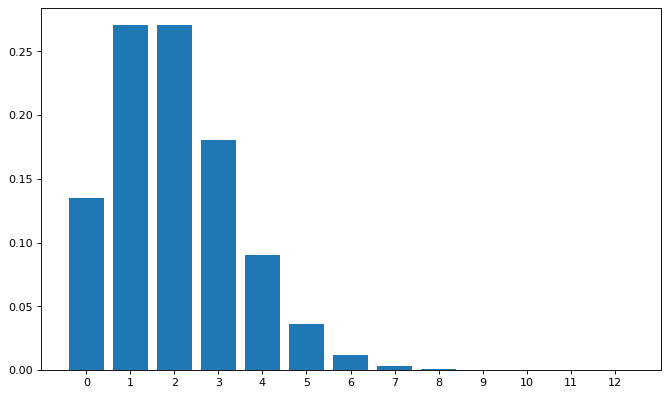

In [377]:
figure(figsize=(10, 6), dpi=80)
x = list(range(0, 13))

plt.bar(list(map(str, x)), [poisson(xi, 2) for xi in x])
plt.show()

## Exponencial

$f(x) = \lambda e^{-\lambda x} \\ x \in (0, \infty)$

Se interpreta como el tiempo esperado hasta que un evento ocurra, siendo $\lambda$ el promedio de ocurrencias en una unidad de tiempo de este intervalo

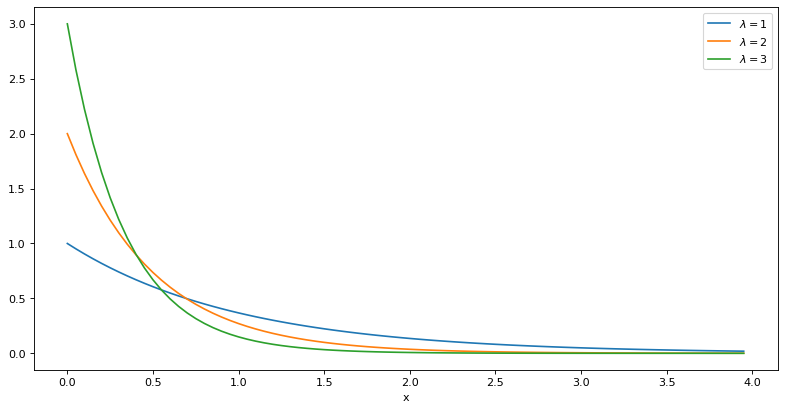

In [378]:
t = np.arange(0, 4, 0.05)
figure(figsize=(12, 6), dpi=80)

def exp(lam, x):
    return lam * math.e ** (-lam * x)

plt.plot(t, exp(1, t), label = "$\lambda = 1$")
plt.plot(t, exp(2, t), label = "$\lambda = 2$")
plt.plot(t, exp(3, t), label = "$\lambda = 3$")
plt.legend(loc='upper right')
plt.xlabel('x')
plt.show()

Por ejemplo: Si se sabe que dos redes descentralizadas se congestionan frecuentemente, la primera en promedio 3 veces al dia y la segunda 1 vez cada 2 dias

Para la primera red el tiempo entre congestiones $\lambda$ será 3 y para la segunda $\lambda$ 1/2

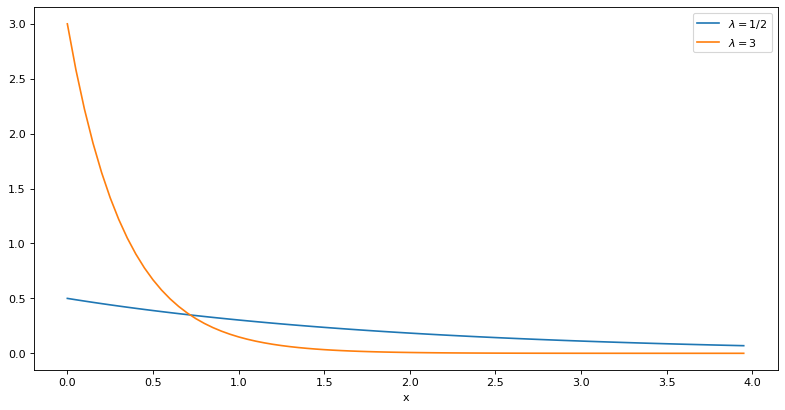

In [379]:
t = np.arange(0, 4, 0.05)
figure(figsize=(12, 6), dpi=80)

def exp(x, lam):
    return lam * math.e ** (-lam * x)

plt.plot(t, exp(t, 1/2), label = "$\lambda = 1/2$")
plt.plot(t, exp(t, 3), label = "$\lambda = 3$")
plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

Como se puede ver en la grafica, cuando $\lambda = 3$ la funcion está bastante acumulada a la izquierda, porque la probabilidad de ocurrencia cuando se empieza a observar es mucho mas alta 

## Gamma

$f(x) = \frac{1}{\Gamma(a)}(\lambda x)^ae^{-\lambda x}\frac{1}{x} \\ x \in (0, \infty)$

Cuando $\alpha$ es un numero entero positivo, se interpreta como el tiempo esperado hasta que $\alpha = n$ eventos ocurran, donde cada evento se distribuye exponencialmente con parametro $\lambda$, el parametro $\beta = \lambda$ 

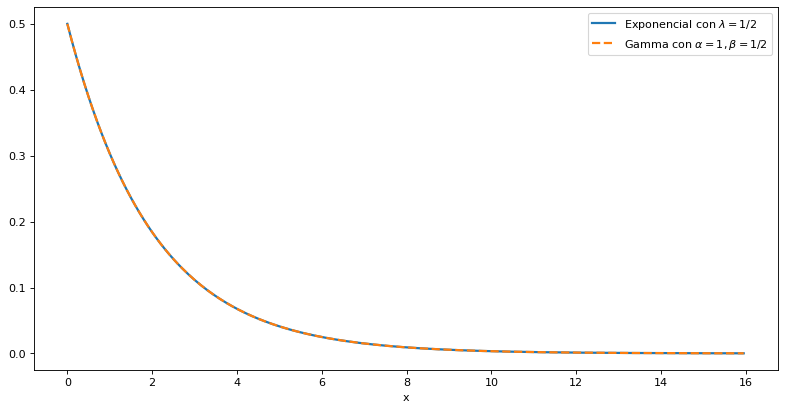

In [380]:

def gamma(x, alpha, beta):
    return (beta**alpha * x ** (alpha - 1) * math.e ** (-beta * x)) / (math.gamma(alpha))


t = np.arange(0, 16, 0.05)
figure(figsize=(12, 6), dpi=80)

plt.plot(t, exp(t, 1/2),'-', label = "Exponencial con $\lambda = 1/2$", linewidth=2)
plt.plot(t, gamma(t, 1, 1/2),'--',label = "Gamma con $\\alpha = 1, \\beta = 1/2$", linewidth=2)
plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

Ejemplo: Un observador sabe que en promedio un canal procesa 10 transacciónes por minuto, el tiempo de espera se distribuye exponencialmente con una ocurrencia $\lambda$ de 10, el observador quiere saber cuanto tiempo le tomaria a la red alcanzar $n$ en cierto dia, este tiempo se modela con una distribución $Gamma(n, 10)$.
Digamos que el observador quiere saber cuanto le tomaria avistar 20 y 100 transacciónes 

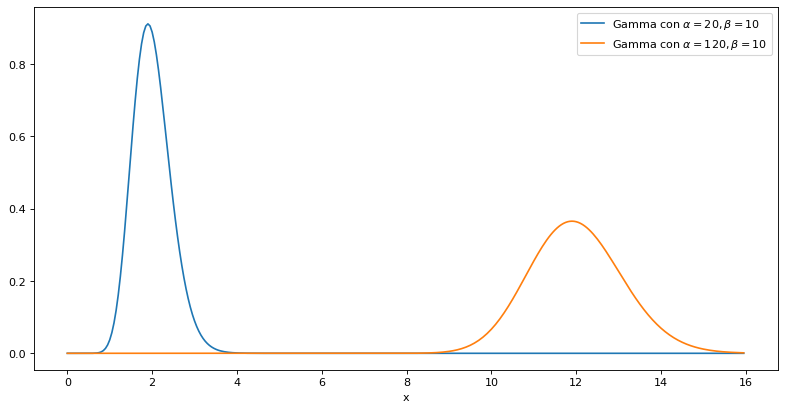

In [381]:
x = np.arange(0, 16, 0.05)
figure(figsize=(12, 6), dpi=80)

plt.plot(x, gamma(x, 20, 10),label = "Gamma con $\\alpha = 20, \\beta = 10$")
plt.plot(x, gamma(x, 120, 10),label = "Gamma con $\\alpha = 120, \\beta = 10$")

plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

Se pueden observar las probabilidades, para terminados los 3 minutos la probabilidad que ya se hayan hecho 20 transacciones es alta, como a los 15 minutos para las 120 transacciones.

## Normal

La distribución normal es simetrica en $\mu$

Se interpreta como la densidad de medidas en una poblacion cuando $n$ es grande

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{(2 \sigma^2)}} \\ x \in (-\infty, \infty)$


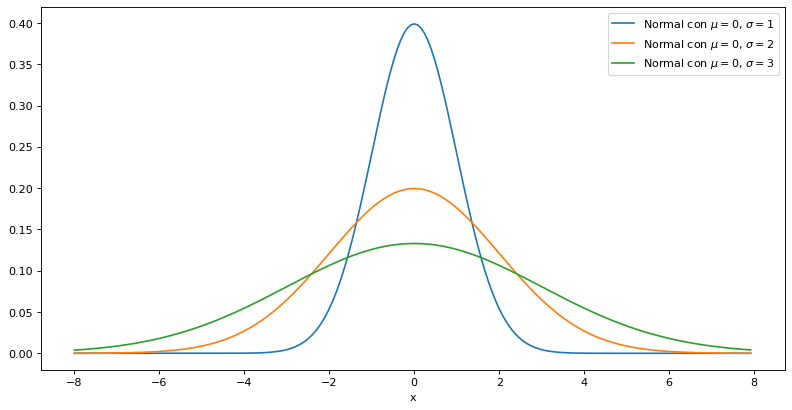

In [382]:

def normal(x, mean, sd):
    exponente = (-1/2) * ((x - mean) / sd)**2 
    return (1/(sd* (2*math.pi)**(1/2)))*math.e**exponente
    
x = np.arange(-8, 8, 0.08)
figure(figsize=(12, 6), dpi=80)

plt.plot(x, normal(x, 0, 1),label = "Normal con $\\mu = 0$, $\\sigma = 1$")
plt.plot(x, normal(x, 0, 2),label = "Normal con $\\mu = 0$, $\\sigma = 2$")
plt.plot(x, normal(x, 0, 3),label = "Normal con $\\mu = 0$, $\\sigma = 3$")

plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

Ejemplo: En una canal, cada vez que entra una transaccion se guarda el tiempo transcurrido y se reinicia una cuenta hasta que llegue la siguiente, se sabe que este tiempo de espera es exponencial

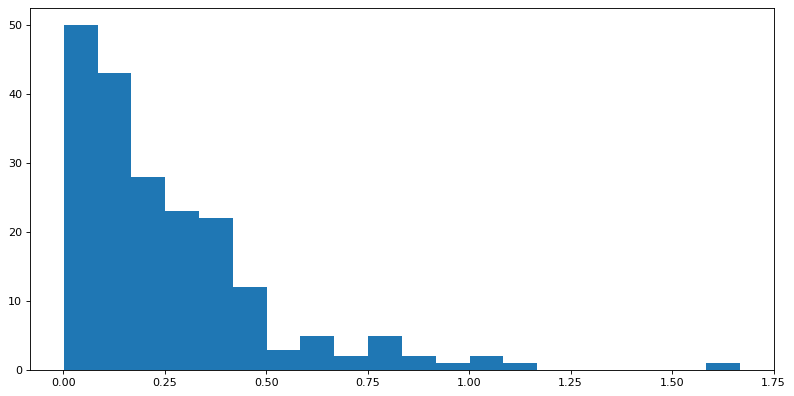

In [383]:
from numpy import random

figure(figsize=(12, 6), dpi=80)
tiempos = random.exponential(scale = 1/4, size=200)

plt.hist(tiempos, bins=20)
plt.show()



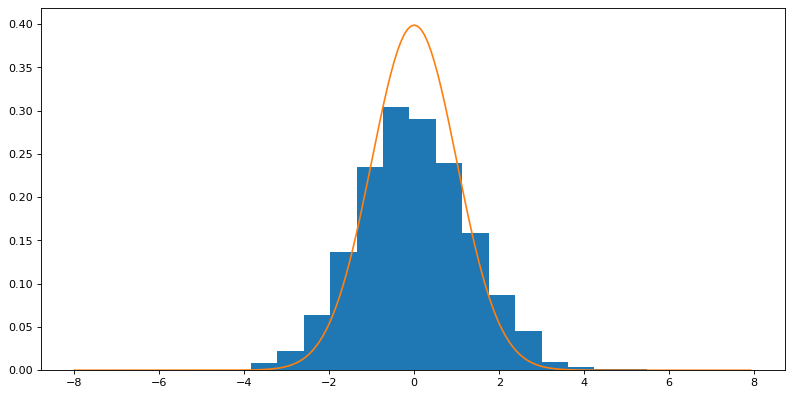

In [384]:
expmeans = np.array([])
lam = 4
media = 1 / lam
desv = 1 / lam ** 2

for i in range(1000):
    randexp = random.exponential(scale = 1/lam, size=200)
    expm = randexp.mean()
    expmeans = np.append(expmeans, expm)


figure(figsize=(12, 6), dpi=80)
x = np.arange(-8, 8, 0.08)
plt.hist(((20)**(1/2) *  (expmeans - media)) / desv, density=True, bins=15)
plt.plot(x, normal(x, 0, 1),label = "Normal con $\\mu = 0$, $\\sigma = 1$")
plt.show()



## Chi-Cuadrado

$\frac{1}{2^{n/2}\Gamma(n/2)}x^{n/2 - 1}e^{-x/2} \\ x \in (0, \infty) $

Si $X$ se distribuyen normalmente $X^2$ se distribuirá Chi-Cuadrado


In [385]:
normal(3, 0, 1)**(1/2)

0.06657212939314776

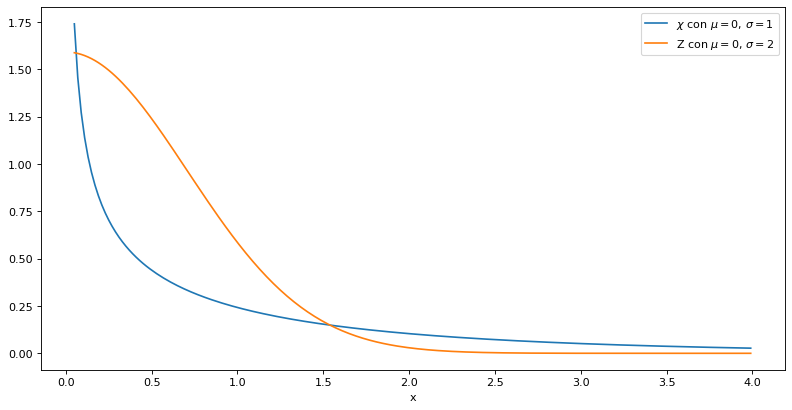

In [386]:

def chisq(x, n):
    primero = 1 / (2**(n/2) * math.gamma(n/2))
    segundo = x**(n/(2) - 1) * math.e**(-x/2)
    return primero * segundo

def zsquare(x):
    return (1/(2*math.pi)) * math.e**(-(x**2))*10




xf = np.arange(-4, 4, 0.02)
x = np.arange(0.05, 4, 0.02)

figure(figsize=(12, 6), dpi=80)

plt.plot(x, chisq(x, 1),label = "$\chi$ con $\\mu = 0$, $\\sigma = 1$")
plt.plot(x, zsquare(x),label = "Z con $\\mu = 0$, $\\sigma = 2$")
# plt.plot(x, normal(x, 0, 1),label = "Z con $\\mu = 0$, $\\sigma = 2$")

plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()
